In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scp
import seaborn as sns

# k-mers generation

In [6]:
olga_trb = pd.read_csv('/home/dluppov/milarge_files/TRB_10_7_1.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
keck_raw = pd.read_csv('naive_clonotypes_keck_nt.csv.gz')

#filter ancanonical seqs
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'), 
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'),
                             keck_raw.cdr3aa.str.endswith('F')))]

In [8]:
keck_raw

cdr3nt            cdr3aa   
0                 TGTGCCAGCAGCTTAGCTCTTGGCAATGAGCAGTTCTTC     CASSLALGNEQFF  \
1           TGTGCCAGCAGTTCGGGACTAGTCCTGGGCAATGAGCAGTTCTTC   CASSSGLVLGNEQFF   
2           TGTGCCAGCAGTTACACGACTAGCGGGGGCAATGAGCAGTTCTTC   CASSYTTSGGNEQFF   
3        TGTGCCAGCAGTAAATTCCCGACGAGGGACGGCAATGAGCAGTTCTTC  CASSKFPTRDGNEQFF   
4           TGTGCCAGCAGCTTAGTAGGAGGGCGTCGCAATGAGCAGTTCTTC   CASSLVGGRRNEQFF   
...                                                   ...               ...   
1152047     TGTGCCAGCTCACCCCAGACAGGGGGCAACACTGAAGCTTTCTTT   CASSPQTGGNTEAFF   
1152048           TGTGCCGTCCACACCCAGGGTCGAACTGAAGCTTTCTTT     CAVHTQGRTEAFF   
1152049        TGTGCCAGTAGTATTGGGGCAGGGAGAACTGAAGCTTTCTTT    CASSIGAGRTEAFF   
1152050                 TGTGCCAGCAGTGCTCGTTATGAAGCTTTCTTT       CASSARYEAFF   
1152051        TGTGCCAGCAGCTCCAGGATACTGTCAGCTACGACTTTCTTT    CASSSRILSATTFF   

                v        j  
0         TRBV7-6  TRBJ2-1  
1          TRBV28  TRBJ2-1  
2         TRBV6-6  TRBJ2-1  
3        TRBV25-1  TRBJ2-1  
4         TRBV7-3  TRBJ2-1  
...           ...      ...  
1152047    TRBV18  TRBJ1-1  
1152048    TRBV28  TRBJ1-1  
1152049    TRBV19  TRBJ1-1  
1152050    TRBV28  TRBJ1-1  
1152051   TRBV5-4  TRBJ1-1  

[1147250 rows x 4 columns]

In [3]:
#kmeres count code

from itertools import islice
import tqdm
 
def over_slice(test_str, k=4):
    itr = iter(test_str)
    res = tuple(islice(itr, k))
    if len(res) == k:
        yield res   
    for ele in itr:
        res = res[1:] + (ele,)
        yield res

        
def k_mers_list_generatot(seq, k=4):
    res = ["".join(ele) for ele in over_slice(seq, k)]
    return res

In [4]:
res = keck_raw.cdr3aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=3)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./Sample_k3mers_counts.csv')

In [5]:
res = olga_trb.aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=3)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./Olga1_k3mers_counts.csv')

# 1-mers

In [1]:
#calculate and save the counts of all aa in TCR

res = olga_trb.aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=1)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./olga_letter_counts_results.csv')

res = keck_raw.cdr3aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=1)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./keck_letter_counts_results.csv')


Text(0.5, 1.0, 'KECK freqs')

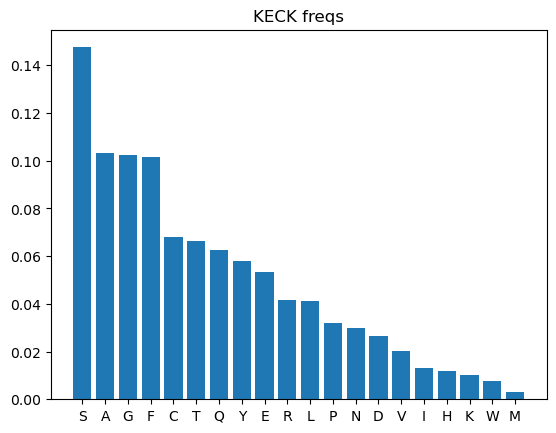

In [8]:
keck_letters = pd.read_csv('/home/dluppov/keck_letter_counts_results.csv', index_col=0)
keck_letters = keck_letters["0"].sort_values(ascending=False)

# keck_letters = keck_letters[0].sort_values()
plt.bar(keck_letters.index, keck_letters/keck_letters.sum())
plt.title('KECK freqs')

Text(0.5, 1.0, 'OLGA freqs')

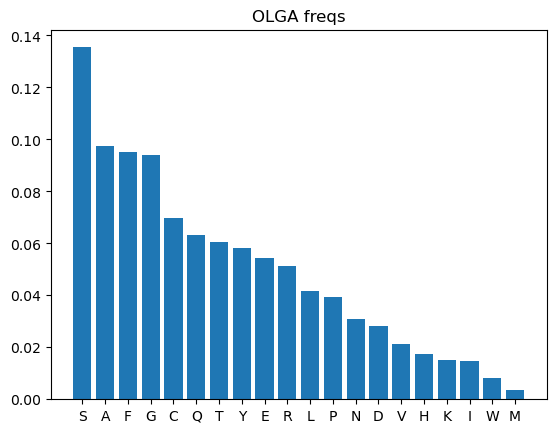

In [9]:
olga_letters = pd.read_csv('/home/dluppov/olga_letter_counts_results.csv', index_col=0)
olga_letters = olga_letters["0"].sort_values(ascending=False)

# keck_letters = keck_letters[0].sort_values()
plt.bar(olga_letters.index, olga_letters/olga_letters.sum())
plt.title('OLGA freqs')

Text(0.5, 1.0, 'KECK vs OLGA freqs')

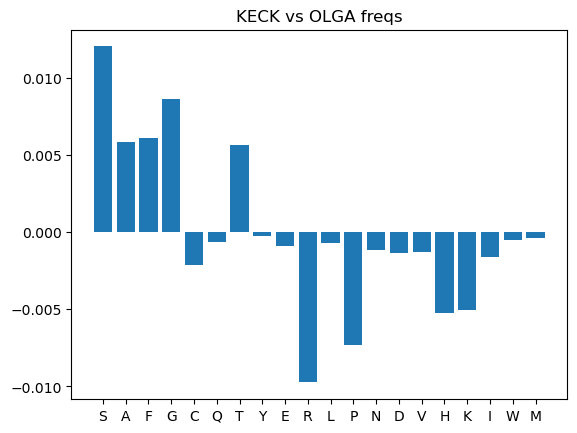

In [10]:
#differences in freqs
keck_letters = keck_letters[olga_letters.index]
plt.bar(keck_letters.index, keck_letters/keck_letters.sum() - olga_letters/olga_letters.sum())
plt.title('KECK vs OLGA freqs')

Text(0.5, 1.0, 'OLGA vs KECK freqs')

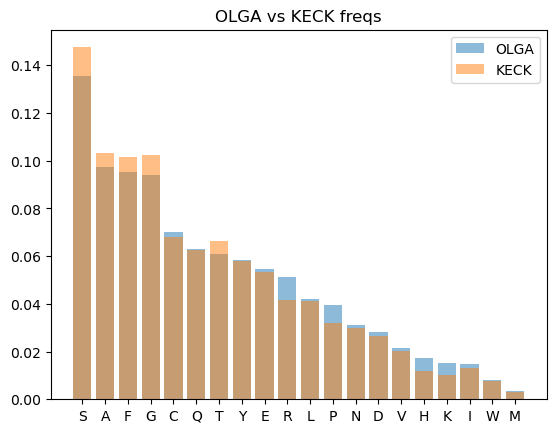

In [11]:
plt.bar(olga_letters.index, olga_letters/olga_letters.sum(), alpha = 0.5, label = 'OLGA')
plt.bar(keck_letters.index, keck_letters/keck_letters.sum(), alpha = 0.5, label = 'KECK')
plt.legend()
plt.title('OLGA vs KECK freqs')

# 1-mers cutted

In [2]:
# to avoid bias cosed by canonical 1 and last letters we will cut them and calculate the freqs of aa usage

res = res_olga['aa'].apply(lambda x: x[1:-1]).apply(lambda x: np.array(k_mers_list_generatot(x, k=1)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./olga_letter_counts_results_cutted.csv')

res = keck_raw.cdr3aa.apply(lambda x: x[1:-1]).apply(lambda x: np.array(k_mers_list_generatot(x, k=1)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./keck_letter_counts_results_cutted.csv')

Text(0.5, 1.0, 'OLGA vs KECK freqs cutted')

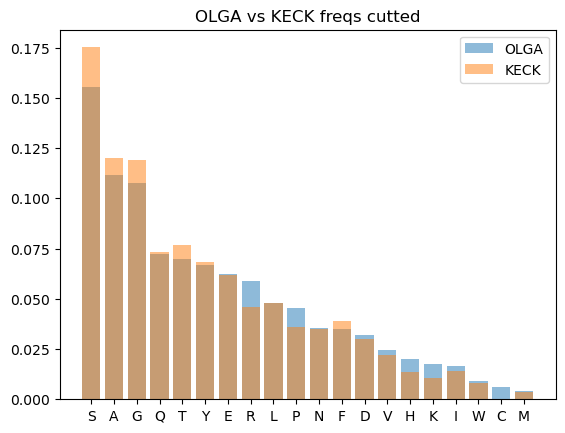

In [16]:
olga_letters = pd.read_csv('/home/dluppov/olga_letter_counts_results_cutted.csv', index_col=0)
olga_letters = olga_letters["0"].sort_values(ascending=False)
keck_letters = pd.read_csv('./keck_letter_counts_results_cutted.csv', index_col=0)
keck_letters = keck_letters['0'][olga_letters.index]

plt.bar(olga_letters.index, olga_letters/olga_letters.sum(), alpha = 0.5, label = 'OLGA')
plt.bar(keck_letters.index, keck_letters/keck_letters.sum(), alpha = 0.5, label = 'KECK')
plt.legend()
plt.title('OLGA vs KECK freqs cutted')

Text(0.5, 1.0, 'KECK vs OLGA freqs cutted')

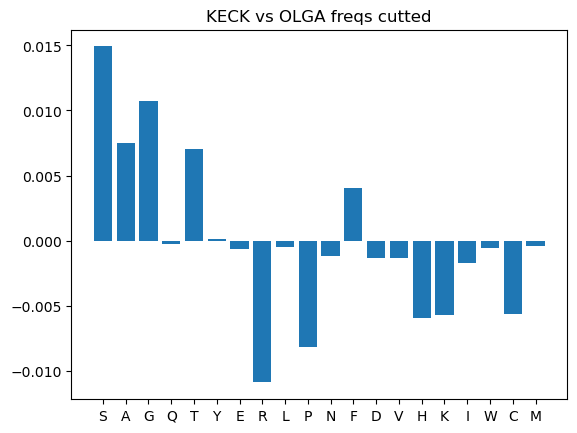

In [15]:
plt.bar(keck_letters.index, keck_letters/keck_letters.sum() - olga_letters/olga_letters.sum())
plt.title('KECK vs OLGA freqs cutted')

# Freqs plots with statistics

In [22]:
keck_kmers = pd.read_csv('./Sample_k3mers_counts.csv', index_col=0)
olga_kmers = pd.read_csv('Olga1_k3mers_counts.csv', index_col=0)

common_kmers = list(set(keck_kmers.index).intersection(olga_kmers.index))

olga_kmers = olga_kmers.loc[common_kmers]
keck_kmers = keck_kmers.loc[common_kmers]


keck_kmers = keck_kmers['count']
olga_kmers = olga_kmers['count']

keck_kmers.name = 'keck_freq'
olga_kmers.name = 'olga_freq'

n = keck_kmers.sum()
m = olga_kmers.sum()
ps = olga_kmers/olga_kmers.sum()
mus = ps*n


In [23]:
#chi squere test for k-mer freqs in KECK vs OLGA
res_dict = {}
for ind in keck_kmers.index:
    res_dict[ind] = scp.chi2_contingency([[keck_kmers[ind], n - keck_kmers[ind]],
                                         [olga_kmers[ind], m - olga_kmers[ind]]])[1]

In [31]:
p_vals = pd.Series(res_dict)
p_vals

INF    1.932896e-05
NIE    1.779911e-02
NYS    7.808798e-43
MWM    6.939033e-01
CVF    2.647327e-12
           ...     
DRM    3.578393e-05
TCN    1.312116e-66
PYR    7.022240e-21
PYG    3.653043e-10
ARF    1.380040e-50
Length: 7852, dtype: float64

In [8]:
p_vals = pd.Series(res_dict)
p_vals

SPH     7.970274e-01
KKF     4.291385e-05
ARD    3.151527e-276
KIG     2.925782e-04
EII     2.563858e-05
           ...      
YGM     2.234259e-01
DTP     1.127287e-09
DQS     6.534824e-03
ATT     5.001376e-09
PDF     4.000826e-02
Length: 7852, dtype: float64

In [25]:
p_vals = p_vals.apply(lambda x: 10**(-100) if x < 10**(-100) else x)

In [26]:
log_pvals = np.log10(p_vals)
log_pvals

MIQ    -1.058910
ARM    -7.481055
ALT    -0.290079
AMV   -12.846453
YYG    -0.538791
         ...    
SSW   -66.244513
RVW   -10.397931
PVQ   -23.122070
LWN    -4.272193
FAP    -4.276479
Length: 7852, dtype: float64

In [27]:
keck_kmers = keck_kmers/keck_kmers.sum()
olga_kmers = olga_kmers/olga_kmers.sum()

fold_change_freq = np.log2(keck_kmers/olga_kmers)
fold_change_freq.name = 'log2FC'

keck_kmers = np.log2(keck_kmers[fold_change_freq.index])
olga_kmers = np.log2(olga_kmers[fold_change_freq.index])


summing_df = pd.concat([fold_change_freq, olga_kmers, keck_kmers], axis = 1)
summing_df

log2FC  olga_freq  keck_freq
MIQ -0.464853 -18.277731 -18.742584
ARM -0.417542 -14.743727 -15.161269
ALT  0.024300 -13.042267 -13.017967
AMV -1.153704 -16.207009 -17.360713
YYG -0.027864 -12.030769 -12.058632
..        ...        ...        ...
SSW -0.245894 -10.087942 -10.333836
RVW -0.451179 -14.425906 -14.877085
PVQ -0.804814 -14.577022 -15.381837
LWN -0.428410 -15.700357 -16.128767
FAP -0.437294 -15.749771 -16.187065

[7852 rows x 3 columns]

In [28]:
summing_df_all = pd.concat([summing_df, log_pvals], axis = 1)
summing_df_all.rename(columns = {0: 'log10_p_val'}, inplace = True)
summing_df_all

log2FC  olga_freq  keck_freq  log10_p_val
MIQ -0.464853 -18.277731 -18.742584    -1.058910
ARM -0.417542 -14.743727 -15.161269    -7.481055
ALT  0.024300 -13.042267 -13.017967    -0.290079
AMV -1.153704 -16.207009 -17.360713   -12.846453
YYG -0.027864 -12.030769 -12.058632    -0.538791
..        ...        ...        ...          ...
SSW -0.245894 -10.087942 -10.333836   -66.244513
RVW -0.451179 -14.425906 -14.877085   -10.397931
PVQ -0.804814 -14.577022 -15.381837   -23.122070
LWN -0.428410 -15.700357 -16.128767    -4.272193
FAP -0.437294 -15.749771 -16.187065    -4.276479

[7852 rows x 4 columns]

In [29]:
#marker if C in kmer

c_marker = pd.Series(summing_df_all.index).apply(lambda x: True if 'C' in x else False)
c_marker.index = summing_df_all.index
summing_df_all.insert(4, 'c_marker', c_marker)

In [37]:
summing_df_all.to_csv('3mer_tes_data.csv')

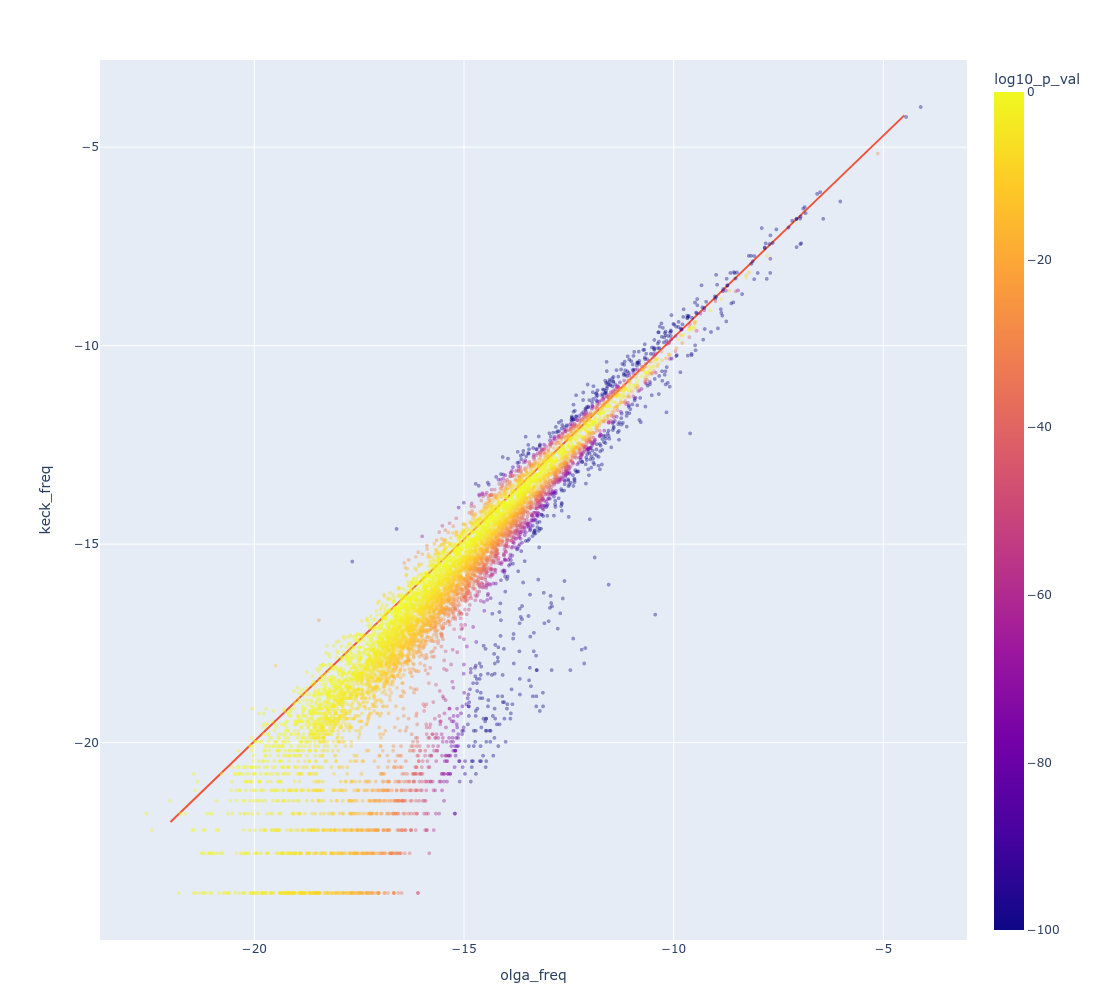

In [30]:
import plotly.express as px

fig = px.scatter(summing_df_all, x="olga_freq", y="keck_freq",
                 color="log10_p_val",
                 #color_discrete_sequence=px.colors.qualitative.Antique
                )
fig.update_traces(marker=dict(size=4, opacity = 0.4))

fig.add_scatter(x = [-22, -4.5], y = [-22, -4.5], mode = 'lines')
fig.update_layout(showlegend=False)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=100,
        r=100,
       b=60,
        t=60,
        pad=0
    ),
)

fig.show()

In [19]:
#fig.write_html('/home/dluppov/repo/tcr-thymic-selection/naive_cells/html_plots/olga_keck_freqs.html')

In [32]:
summing_df_all_cluster = summing_df_all[summing_df_all.olga_freq - summing_df_all.keck_freq > 2.5]

In [41]:
#glycomarker

glyco_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] == 'N' and (x[2] == 'T' or x[2] == 'S') else False)
glyco_marker.index = summing_df_all.index
summing_df_all.insert(5, 'glyco_marker', glyco_marker)

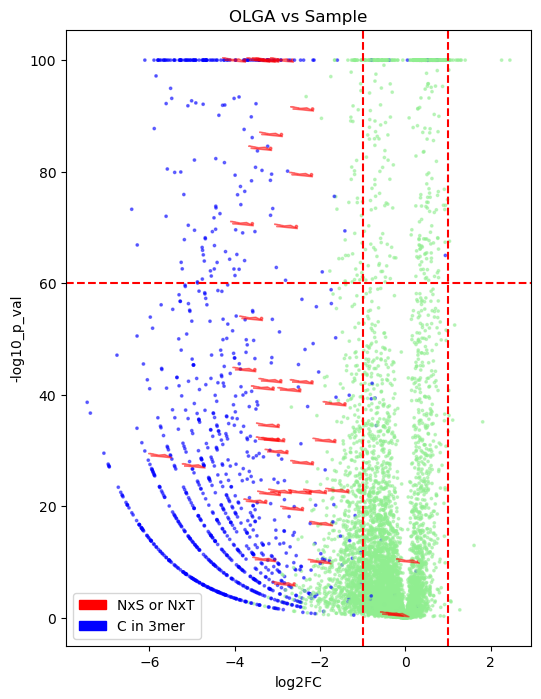

In [21]:
#volcanoplot to show fc and p of glycosylation sites

import matplotlib.patches as mpatches

plt.figure(figsize=(6, 8))
#colors = summing_df_all.glyco_marker.apply(lambda x: 'r' if x else 'b')

colors = np.where(summing_df_all.c_marker, 'b', np.where(summing_df_all.glyco_marker, 'r', 'lightgreen'))

plt.scatter(summing_df_all.log2FC, -summing_df_all.log10_p_val, s = 3, c=colors, alpha=0.5)
plt.xlabel('log2FC')
plt.ylabel('-log10_p_val')
plt.axvline(-1, color= 'r', linestyle = '--')
plt.axvline(1, color = 'r', linestyle = '--')
plt.axhline(60, color = 'r', linestyle = '--')

red_patch = mpatches.Patch(color='r', label='NxS or NxT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')

plt.legend(handles=[red_patch, blue_patch])

plt.title('OLGA vs Sample')

for i in range(len(summing_df_all)):
#     if summing_df_all.iloc[i]['c_marker']:
#         plt.arrow(summing_df_all.iloc[i]['log2FC'], -summing_df_all.iloc[i]['log10_p_val'], 0, 0.5, color='b', width=0.02, head_width=0.1, alpha=0.5)
     if summing_df_all.iloc[i]['glyco_marker']:
        plt.arrow(-0.5+summing_df_all.iloc[i]['log2FC'], 0.415-summing_df_all.iloc[i]['log10_p_val'], 0.2, -0.3, color='r', width=0.05, head_width=0.4, alpha=0.5)

In [39]:
# glutamyl carboxylation site 
er_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] in {'E', 'R'} and x[1] == 'E' and x[2] in {'E', 'R'} else False)
er_marker.index = summing_df_all.index

summing_df_all.insert(5, 'er_marker', er_marker)

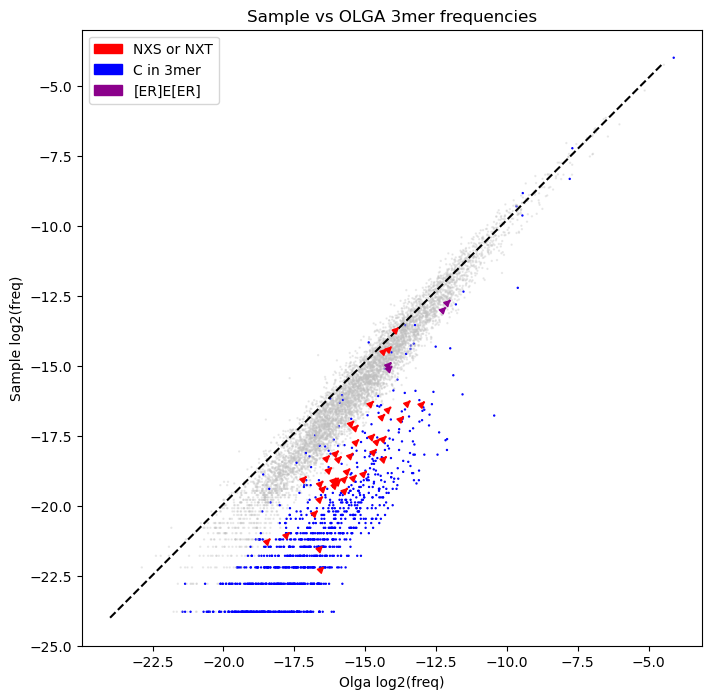

In [43]:
import matplotlib.patches as mpatches

colors = np.where(summing_df_all.c_marker, 'b',
                  np.where(summing_df_all.glyco_marker, 'r',
                           np.where(summing_df_all.er_marker, 'darkmagenta', 'silver')))
alpha = np.where(summing_df_all.c_marker, 1,
                  np.where(summing_df_all.glyco_marker, 1,
                           np.where(summing_df_all.er_marker, 1, 0.3)))


plt.figure(figsize=(8, 8))
plt.scatter(olga_kmers,
            keck_kmers,
            s = 0.5,
            alpha = alpha, c = colors)
plt.plot([-24, -4.5], [-24, -4.5], '--', c = 'black')
plt.xlabel('Olga log2(freq)')
plt.ylabel('Sample log2(freq)')

for i, row in summing_df_all[summing_df_all.glyco_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='red', headwidth=4, headlength=4, edgecolor='red'))
    
for i, row in summing_df_all[summing_df_all.er_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='darkmagenta', headwidth=4, headlength=4, edgecolor='darkmagenta'))
    
plt.title('Sample vs OLGA 3mer frequencies')

red_patch = mpatches.Patch(color='r', label='NXS or NXT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')
magenta_patch = mpatches.Patch(color='darkmagenta', label='[ER]E[ER]')

plt.legend(handles=[red_patch, blue_patch, magenta_patch])

# Physical chemistry

In [44]:
import peptides

In [51]:
#charge calcualtion for OLGA
olga_trb_charge = olga_trb.aa.apply(lambda x: peptides.Peptide(x).charge())

In [52]:
pd.concat([olga_trb, olga_trb_charge], axis = 1).to_csv('/home/dluppov/olga_trb_charge.csv')

In [45]:
keck_raw = pd.read_csv('naive_clonotypes_keck_nt.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               

In [46]:
keck_raw_charge = keck_raw.cdr3aa.apply(lambda x: peptides.Peptide(x).charge())
keck_raw_charge

0         -1.062215
1         -1.062215
2         -1.063066
3         -0.062067
4          0.937778
             ...   
1152047   -1.062215
1152048    0.028690
1152049   -0.062219
1152050   -0.063069
1152051    0.936006
Name: cdr3aa, Length: 1147250, dtype: float64

In [47]:
keck_raw_charge.name = 'charge'

In [48]:
pd.concat([keck_raw, keck_raw_charge], axis = 1).to_csv('./keck_charge.csv')

In [49]:
keck_charge = pd.read_csv('keck_charge.csv')
olga_charge = pd.read_csv('/home/dluppov/olga_trb_charge.csv')

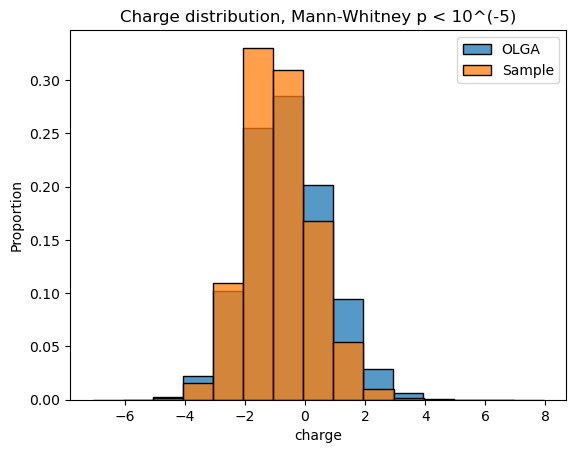

In [50]:
sns.histplot(olga_charge.charge, binwidth= 1 , stat = 'proportion', label = 'OLGA')
sns.histplot(keck_charge.charge, binwidth = 1, stat = "proportion", label = 'Sample')
plt.title('Charge distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

In [51]:
charge_res =scp.mannwhitneyu(olga_charge.charge, keck_charge.charge)
charge_res

MannwhitneyuResult(statistic=5167613731190.0, pvalue=0.0)

In [52]:
keck_hydrophobicity = keck_charge.cdr3aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
keck_hydrophobicity

0          0.523077
1          0.533333
2         -0.433333
3         -0.875000
4         -0.266667
             ...   
1147245   -0.280000
1147246   -0.046154
1147247    0.492857
1147248    0.236364
1147249    0.778571
Name: cdr3aa, Length: 1147250, dtype: float64

In [53]:
pd.concat([keck_charge, keck_hydrophobicity], axis = 1).to_csv('./keck_charge_hydrophobicity.csv')

In [55]:
olga_trb_hydrophobicity = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv',index_col=0)
keck_hydrophobicity = pd.read_csv('./keck_charge_hydrophobicity.csv', index_col=0)
#olga_trb_hydrophobicity.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1).to_csv('olga_trb_charge_hydrophobicity.csv')

In [58]:
olga_trb_hydrophobicity.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_hydrophobicity.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

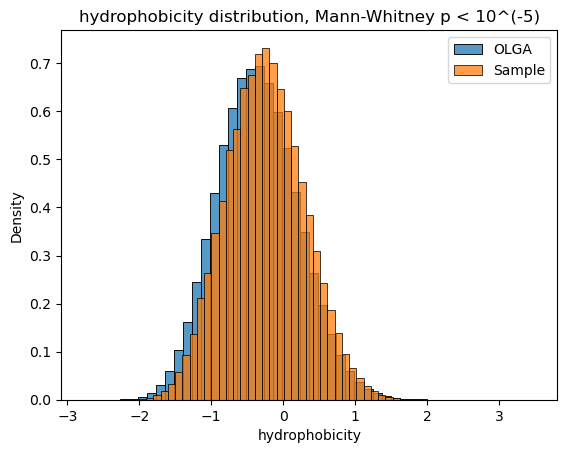

In [59]:
sns.histplot(olga_trb_hydrophobicity.hydrophobicity, bins = 50, stat = 'density', label = 'OLGA')
sns.histplot(keck_hydrophobicity.hydrophobicity, bins = 50, stat = "density", label = 'Sample')
plt.title('hydrophobicity distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

In [41]:
olga_lens = olga_trb_hydrophobicity.aa.apply(len)
keck_kens = keck_hydrophobicity.cdr3aa.apply(len)

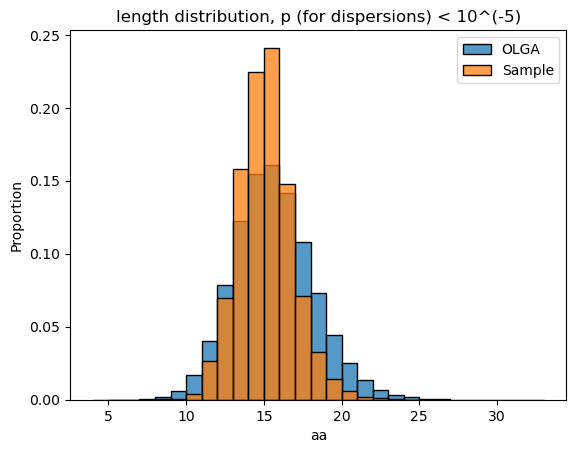

In [60]:
sns.histplot(olga_trb_hydrophobicity.aa.apply(len), binwidth = 1, stat = 'proportion', label = 'OLGA')
sns.histplot(keck_hydrophobicity.cdr3aa.apply(len), binwidth = 1, stat = 'proportion', label = 'Sample')
plt.title('length distribution, p (for dispersions) < 10^(-5)')
plt.legend()
plt.show()

In [42]:
res_lens= scp.kruskal(olga_lens, keck_kens)
res_lens

KruskalResult(statistic=10762.210284472058, pvalue=0.0)

In [43]:
olga_lens.std()/keck_kens.std()

1.4376460476808546

In [44]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) 
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-scp.f.cdf(f, dfn, dfd)
    return f, p

In [45]:
f_test(olga_lens, keck_kens)

(2.066826158397984, 1.1102230246251565e-16)